In [1]:
from astropy.table import Table
import corner
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 11
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r'''
\usepackage{physics}
\usepackage{siunitx}
%%% astronomical units
\DeclareSIUnit \au {au}
\DeclareSIUnit \jansky {Jk}
\DeclareSIUnit \ly {ly}
\DeclareSIUnit \parsec {pc}
\DeclareSIUnit \mag {mag}
\DeclareSIUnit \solarmass {\ensuremath{\mathit{M_{\odot}}}}
\DeclareSIUnit \yr {yr}
%%% cgs units
\DeclareSIUnit \erg {erg}
\DeclareSIUnit \cm {cm}
\DeclareSIUnit \gram {g}
'''

In [2]:
cosmos2020_cat=Table.read('COSMOS2020_photometric_only.fits', format='fits', memmap=True)

In [9]:
print(len(cosmos2020_cat))

1720700


In [ ]:
mask_AUTO_grt_3 = (
    (cosmos2020_cat['CFHT_u_FLUX_AUTO'] > 0) &
    (cosmos2020_cat['HSC_g_FLUX_AUTO'] > 0) &
    (cosmos2020_cat['HSC_r_FLUX_AUTO'] > 0) &
    (cosmos2020_cat['HSC_i_FLUX_AUTO'] > 0) &
    (cosmos2020_cat['HSC_z_FLUX_AUTO'] > 0) &
    (cosmos2020_cat['HSC_y_FLUX_AUTO'] > 0) &
    (cosmos2020_cat['UVISTA_J_FLUX_AUTO'] > 0) &
    (cosmos2020_cat['UVISTA_H_FLUX_AUTO'] > 0) &
    (cosmos2020_cat['UVISTA_Ks_FLUX_AUTO'] > 0)
)
mask_flag_comb = (cosmos2020_cat['FLAG_COMBINED']==0)
mask_filter_less_3 = (cosmos2020_cat['CFHT_u_FLAGS']<=3) & (cosmos2020_cat['HSC_g_FLAGS']<=3) & (cosmos2020_cat['HSC_r_FLAGS']<=3) & (cosmos2020_cat['HSC_i_FLAGS']<=3) & (cosmos2020_cat['HSC_z_FLAGS']<=3) & (cosmos2020_cat['HSC_y_FLAGS']<=3) & (cosmos2020_cat['UVISTA_Y_FLAGS']<=3) & (cosmos2020_cat['UVISTA_J_FLAGS']<=3) & (cosmos2020_cat['UVISTA_H_FLAGS']<=3) & (cosmos2020_cat['UVISTA_Ks_FLAGS']<=3)
mask_quality_overall = mask_AUTO_grt_3 & mask_flag_comb & mask_filter_less_3
cosmos_reduced = cosmos2020_cat[mask_quality_overall]

In [4]:
#cosmos_reduced.write("cosmos_reduced.fits", overwrite=True)

In [2]:
cosmos_reduced = Table.read('cosmos_reduced.fits', format='fits', memmap=True)
cosmos_reduced

ID,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLUX_RADIUS,KRON_RADIUS,FLAG_HSC,FLAG_SUPCAM,FLAG_UVISTA,FLAG_UDEEP,FLAG_COMBINED,EBV_MW,CFHT_u_FLUX_APER2,CFHT_u_FLUXERR_APER2,CFHT_u_FLUX_APER3,CFHT_u_FLUXERR_APER3,CFHT_u_FLUX_AUTO,CFHT_u_FLUXERR_AUTO,CFHT_u_MAG_APER2,CFHT_u_MAGERR_APER2,CFHT_u_MAG_APER3,CFHT_u_MAGERR_APER3,CFHT_u_MAG_AUTO,CFHT_u_MAGERR_AUTO,CFHT_u_MAG_ISO,CFHT_u_MAGERR_ISO,CFHT_u_FLAGS,CFHT_u_IMAFLAGS_ISO,CFHT_ustar_FLUX_APER2,CFHT_ustar_FLUXERR_APER2,CFHT_ustar_FLUX_APER3,CFHT_ustar_FLUXERR_APER3,CFHT_ustar_FLUX_AUTO,CFHT_ustar_FLUXERR_AUTO,CFHT_ustar_MAG_APER2,CFHT_ustar_MAGERR_APER2,CFHT_ustar_MAG_APER3,CFHT_ustar_MAGERR_APER3,CFHT_ustar_MAG_AUTO,CFHT_ustar_MAGERR_AUTO,CFHT_ustar_MAG_ISO,CFHT_ustar_MAGERR_ISO,CFHT_ustar_FLAGS,CFHT_ustar_IMAFLAGS_ISO,HSC_g_FLUX_APER2,HSC_g_FLUXERR_APER2,HSC_g_FLUX_APER3,HSC_g_FLUXERR_APER3,HSC_g_FLUX_AUTO,HSC_g_FLUXERR_AUTO,HSC_g_MAG_APER2,HSC_g_MAGERR_APER2,HSC_g_MAG_APER3,HSC_g_MAGERR_APER3,HSC_g_MAG_AUTO,HSC_g_MAGERR_AUTO,HSC_g_MAG_ISO,HSC_g_MAGERR_ISO,HSC_g_FLAGS,HSC_g_IMAFLAGS_ISO,HSC_r_FLUX_APER2,HSC_r_FLUXERR_APER2,HSC_r_FLUX_APER3,HSC_r_FLUXERR_APER3,HSC_r_FLUX_AUTO,HSC_r_FLUXERR_AUTO,HSC_r_MAG_APER2,HSC_r_MAGERR_APER2,HSC_r_MAG_APER3,HSC_r_MAGERR_APER3,HSC_r_MAG_AUTO,HSC_r_MAGERR_AUTO,HSC_r_MAG_ISO,HSC_r_MAGERR_ISO,HSC_r_FLAGS,HSC_r_IMAFLAGS_ISO,HSC_i_FLUX_APER2,HSC_i_FLUXERR_APER2,HSC_i_FLUX_APER3,HSC_i_FLUXERR_APER3,HSC_i_FLUX_AUTO,HSC_i_FLUXERR_AUTO,HSC_i_MAG_APER2,HSC_i_MAGERR_APER2,HSC_i_MAG_APER3,HSC_i_MAGERR_APER3,HSC_i_MAG_AUTO,HSC_i_MAGERR_AUTO,HSC_i_MAG_ISO,HSC_i_MAGERR_ISO,HSC_i_FLAGS,HSC_i_IMAFLAGS_ISO,HSC_z_FLUX_APER2,HSC_z_FLUXERR_APER2,HSC_z_FLUX_APER3,HSC_z_FLUXERR_APER3,HSC_z_FLUX_AUTO,HSC_z_FLUXERR_AUTO,HSC_z_MAG_APER2,HSC_z_MAGERR_APER2,HSC_z_MAG_APER3,HSC_z_MAGERR_APER3,HSC_z_MAG_AUTO,HSC_z_MAGERR_AUTO,HSC_z_MAG_ISO,HSC_z_MAGERR_ISO,HSC_z_FLAGS,HSC_z_IMAFLAGS_ISO,HSC_y_FLUX_APER2,HSC_y_FLUXERR_APER2,HSC_y_FLUX_APER3,HSC_y_FLUXERR_APER3,HSC_y_FLUX_AUTO,HSC_y_FLUXERR_AUTO,HSC_y_MAG_APER2,HSC_y_MAGERR_APER2,HSC_y_MAG_APER3,HSC_y_MAGERR_APER3,HSC_y_MAG_AUTO,HSC_y_MAGERR_AUTO,HSC_y_MAG_ISO,HSC_y_MAGERR_ISO,HSC_y_FLAGS,HSC_y_IMAFLAGS_ISO,UVISTA_Y_FLUX_APER2,UVISTA_Y_FLUXERR_APER2,UVISTA_Y_FLUX_APER3,UVISTA_Y_FLUXERR_APER3,UVISTA_Y_FLUX_AUTO,UVISTA_Y_FLUXERR_AUTO,UVISTA_Y_MAG_APER2,UVISTA_Y_MAGERR_APER2,UVISTA_Y_MAG_APER3,UVISTA_Y_MAGERR_APER3,UVISTA_Y_MAG_AUTO,UVISTA_Y_MAGERR_AUTO,UVISTA_Y_MAG_ISO,UVISTA_Y_MAGERR_ISO,UVISTA_Y_FLAGS,UVISTA_Y_IMAFLAGS_ISO,UVISTA_J_FLUX_APER2,UVISTA_J_FLUXERR_APER2,UVISTA_J_FLUX_APER3,UVISTA_J_FLUXERR_APER3,UVISTA_J_FLUX_AUTO,UVISTA_J_FLUXERR_AUTO,UVISTA_J_MAG_APER2,UVISTA_J_MAGERR_APER2,UVISTA_J_MAG_APER3,UVISTA_J_MAGERR_APER3,UVISTA_J_MAG_AUTO,UVISTA_J_MAGERR_AUTO,UVISTA_J_MAG_ISO,UVISTA_J_MAGERR_ISO,UVISTA_J_FLAGS,UVISTA_J_IMAFLAGS_ISO,UVISTA_H_FLUX_APER2,UVISTA_H_FLUXERR_APER2,UVISTA_H_FLUX_APER3,UVISTA_H_FLUXERR_APER3,UVISTA_H_FLUX_AUTO,UVISTA_H_FLUXERR_AUTO,UVISTA_H_MAG_APER2,UVISTA_H_MAGERR_APER2,UVISTA_H_MAG_APER3,UVISTA_H_MAGERR_APER3,UVISTA_H_MAG_AUTO,UVISTA_H_MAGERR_AUTO,UVISTA_H_MAG_ISO,UVISTA_H_MAGERR_ISO,UVISTA_H_FLAGS,UVISTA_H_IMAFLAGS_ISO,UVISTA_Ks_FLUX_APER2,UVISTA_Ks_FLUXERR_APER2,UVISTA_Ks_FLUX_APER3,UVISTA_Ks_FLUXERR_APER3,UVISTA_Ks_FLUX_AUTO,UVISTA_Ks_FLUXERR_AUTO,UVISTA_Ks_MAG_APER2,UVISTA_Ks_MAGERR_APER2,UVISTA_Ks_MAG_APER3,UVISTA_Ks_MAGERR_APER3,UVISTA_Ks_MAG_AUTO,UVISTA_Ks_MAGERR_AUTO,UVISTA_Ks_MAG_ISO,UVISTA_Ks_MAGERR_ISO,UVISTA_Ks_FLAGS,UVISTA_Ks_IMAFLAGS_ISO,SC_IB427_FLUX_APER2,SC_IB427_FLUXERR_APER2,SC_IB427_FLUX_APER3,SC_IB427_FLUXERR_APER3,SC_IB427_FLUX_AUTO,SC_IB427_FLUXERR_AUTO,SC_IB427_MAG_APER2,SC_IB427_MAGERR_APER2,SC_IB427_MAG_APER3,SC_IB427_MAGERR_APER3,SC_IB427_MAG_AUTO,SC_IB427_MAGERR_AUTO,SC_IB427_MAG_ISO,SC_IB427_MAGERR_ISO,SC_IB427_FLAGS,SC_IB427_IMAFLAGS_ISO,SC_IB464_FLUX_APER2,SC_IB464_FLUXERR_APER2,SC_IB464_FLUX_APER3,SC_IB464_FLUXERR_APER3,SC_IB464_FLUX_AUTO,SC_IB464_FLUXERR_AUTO,SC_IB464_MAG_APER2,SC_IB464_MAGERR_APER2,SC_IB464_MAG_APER3,SC_IB

# First Mask: Redshift (lp_type =0)

In [3]:
mask_redshift_lp_type = (cosmos_reduced['lp_type']==0)
cosmos_reduced_redshift_lp_type = cosmos_reduced[mask_redshift_lp_type]

In [4]:
import shutil, os
free = shutil.disk_usage(os.path.dirname(os.path.abspath('cosmos_reduced_redshift_lp_type.fits'))).free
print(f"{free//2**20} MB free where I'm saving")

35389 MB free where I'm saving


In [5]:
cosmos_reduced_redshift_lp_type.write("cosmos_reduced_redshift_lp_type.fits", overwrite=True)

In [4]:
print(len(cosmos_reduced_redshift_lp_type))

527189


# First plot: Redshift distribution

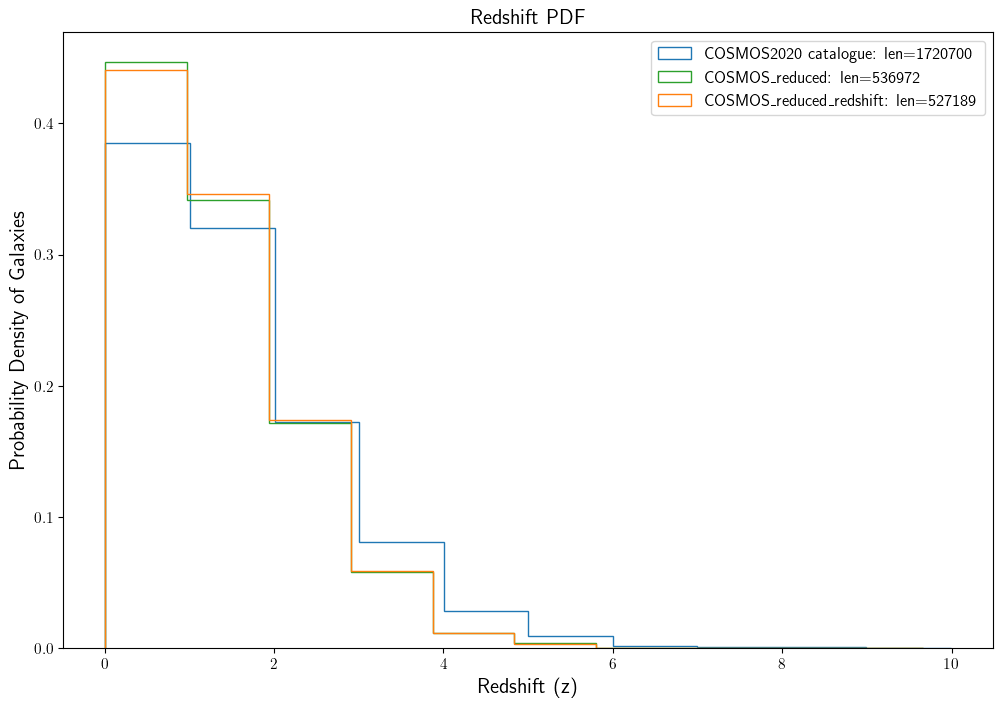

In [6]:
plt.figure(figsize=(12,8))
plt.hist(cosmos2020_cat['lp_zPDF'], histtype='step', color='tab:blue', label='COSMOS2020 catalogue: len=1720700', density=True)
plt.hist(cosmos_reduced['lp_zPDF'], histtype='step', color='tab:green', label='COSMOS_reduced: len=536972', density=True)
plt.hist(cosmos_reduced_redshift_lp_type['lp_zPDF'], histtype='step', color='tab:orange', label='COSMOS_reduced_redshift: len=527189', density=True)
plt.title('Redshift PDF', fontsize=15)
plt.xlabel('Redshift (z)', fontsize=15)
plt.ylabel('Probability Density of Galaxies', fontsize=15)
plt.legend(fontsize=12)
plt.savefig('Redshift_distribution.png')

In [5]:
mask_i_band_mag = (cosmos_reduced_redshift_lp_type['HSC_i_MAG_AUTO']<=22.5)
cosmos_final = cosmos_reduced_redshift_lp_type[mask_i_band_mag]

In [6]:
cosmos_final.write("cosmos_final.fits", overwrite=True)

In [7]:
cosmos_final

ID,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLUX_RADIUS,KRON_RADIUS,FLAG_HSC,FLAG_SUPCAM,FLAG_UVISTA,FLAG_UDEEP,FLAG_COMBINED,EBV_MW,CFHT_u_FLUX_APER2,CFHT_u_FLUXERR_APER2,CFHT_u_FLUX_APER3,CFHT_u_FLUXERR_APER3,CFHT_u_FLUX_AUTO,CFHT_u_FLUXERR_AUTO,CFHT_u_MAG_APER2,CFHT_u_MAGERR_APER2,CFHT_u_MAG_APER3,CFHT_u_MAGERR_APER3,CFHT_u_MAG_AUTO,CFHT_u_MAGERR_AUTO,CFHT_u_MAG_ISO,CFHT_u_MAGERR_ISO,CFHT_u_FLAGS,CFHT_u_IMAFLAGS_ISO,CFHT_ustar_FLUX_APER2,CFHT_ustar_FLUXERR_APER2,CFHT_ustar_FLUX_APER3,CFHT_ustar_FLUXERR_APER3,CFHT_ustar_FLUX_AUTO,CFHT_ustar_FLUXERR_AUTO,CFHT_ustar_MAG_APER2,CFHT_ustar_MAGERR_APER2,CFHT_ustar_MAG_APER3,CFHT_ustar_MAGERR_APER3,CFHT_ustar_MAG_AUTO,CFHT_ustar_MAGERR_AUTO,CFHT_ustar_MAG_ISO,CFHT_ustar_MAGERR_ISO,CFHT_ustar_FLAGS,CFHT_ustar_IMAFLAGS_ISO,HSC_g_FLUX_APER2,HSC_g_FLUXERR_APER2,HSC_g_FLUX_APER3,HSC_g_FLUXERR_APER3,HSC_g_FLUX_AUTO,HSC_g_FLUXERR_AUTO,HSC_g_MAG_APER2,HSC_g_MAGERR_APER2,HSC_g_MAG_APER3,HSC_g_MAGERR_APER3,HSC_g_MAG_AUTO,HSC_g_MAGERR_AUTO,HSC_g_MAG_ISO,HSC_g_MAGERR_ISO,HSC_g_FLAGS,HSC_g_IMAFLAGS_ISO,HSC_r_FLUX_APER2,HSC_r_FLUXERR_APER2,HSC_r_FLUX_APER3,HSC_r_FLUXERR_APER3,HSC_r_FLUX_AUTO,HSC_r_FLUXERR_AUTO,HSC_r_MAG_APER2,HSC_r_MAGERR_APER2,HSC_r_MAG_APER3,HSC_r_MAGERR_APER3,HSC_r_MAG_AUTO,HSC_r_MAGERR_AUTO,HSC_r_MAG_ISO,HSC_r_MAGERR_ISO,HSC_r_FLAGS,HSC_r_IMAFLAGS_ISO,HSC_i_FLUX_APER2,HSC_i_FLUXERR_APER2,HSC_i_FLUX_APER3,HSC_i_FLUXERR_APER3,HSC_i_FLUX_AUTO,HSC_i_FLUXERR_AUTO,HSC_i_MAG_APER2,HSC_i_MAGERR_APER2,HSC_i_MAG_APER3,HSC_i_MAGERR_APER3,HSC_i_MAG_AUTO,HSC_i_MAGERR_AUTO,HSC_i_MAG_ISO,HSC_i_MAGERR_ISO,HSC_i_FLAGS,HSC_i_IMAFLAGS_ISO,HSC_z_FLUX_APER2,HSC_z_FLUXERR_APER2,HSC_z_FLUX_APER3,HSC_z_FLUXERR_APER3,HSC_z_FLUX_AUTO,HSC_z_FLUXERR_AUTO,HSC_z_MAG_APER2,HSC_z_MAGERR_APER2,HSC_z_MAG_APER3,HSC_z_MAGERR_APER3,HSC_z_MAG_AUTO,HSC_z_MAGERR_AUTO,HSC_z_MAG_ISO,HSC_z_MAGERR_ISO,HSC_z_FLAGS,HSC_z_IMAFLAGS_ISO,HSC_y_FLUX_APER2,HSC_y_FLUXERR_APER2,HSC_y_FLUX_APER3,HSC_y_FLUXERR_APER3,HSC_y_FLUX_AUTO,HSC_y_FLUXERR_AUTO,HSC_y_MAG_APER2,HSC_y_MAGERR_APER2,HSC_y_MAG_APER3,HSC_y_MAGERR_APER3,HSC_y_MAG_AUTO,HSC_y_MAGERR_AUTO,HSC_y_MAG_ISO,HSC_y_MAGERR_ISO,HSC_y_FLAGS,HSC_y_IMAFLAGS_ISO,UVISTA_Y_FLUX_APER2,UVISTA_Y_FLUXERR_APER2,UVISTA_Y_FLUX_APER3,UVISTA_Y_FLUXERR_APER3,UVISTA_Y_FLUX_AUTO,UVISTA_Y_FLUXERR_AUTO,UVISTA_Y_MAG_APER2,UVISTA_Y_MAGERR_APER2,UVISTA_Y_MAG_APER3,UVISTA_Y_MAGERR_APER3,UVISTA_Y_MAG_AUTO,UVISTA_Y_MAGERR_AUTO,UVISTA_Y_MAG_ISO,UVISTA_Y_MAGERR_ISO,UVISTA_Y_FLAGS,UVISTA_Y_IMAFLAGS_ISO,UVISTA_J_FLUX_APER2,UVISTA_J_FLUXERR_APER2,UVISTA_J_FLUX_APER3,UVISTA_J_FLUXERR_APER3,UVISTA_J_FLUX_AUTO,UVISTA_J_FLUXERR_AUTO,UVISTA_J_MAG_APER2,UVISTA_J_MAGERR_APER2,UVISTA_J_MAG_APER3,UVISTA_J_MAGERR_APER3,UVISTA_J_MAG_AUTO,UVISTA_J_MAGERR_AUTO,UVISTA_J_MAG_ISO,UVISTA_J_MAGERR_ISO,UVISTA_J_FLAGS,UVISTA_J_IMAFLAGS_ISO,UVISTA_H_FLUX_APER2,UVISTA_H_FLUXERR_APER2,UVISTA_H_FLUX_APER3,UVISTA_H_FLUXERR_APER3,UVISTA_H_FLUX_AUTO,UVISTA_H_FLUXERR_AUTO,UVISTA_H_MAG_APER2,UVISTA_H_MAGERR_APER2,UVISTA_H_MAG_APER3,UVISTA_H_MAGERR_APER3,UVISTA_H_MAG_AUTO,UVISTA_H_MAGERR_AUTO,UVISTA_H_MAG_ISO,UVISTA_H_MAGERR_ISO,UVISTA_H_FLAGS,UVISTA_H_IMAFLAGS_ISO,UVISTA_Ks_FLUX_APER2,UVISTA_Ks_FLUXERR_APER2,UVISTA_Ks_FLUX_APER3,UVISTA_Ks_FLUXERR_APER3,UVISTA_Ks_FLUX_AUTO,UVISTA_Ks_FLUXERR_AUTO,UVISTA_Ks_MAG_APER2,UVISTA_Ks_MAGERR_APER2,UVISTA_Ks_MAG_APER3,UVISTA_Ks_MAGERR_APER3,UVISTA_Ks_MAG_AUTO,UVISTA_Ks_MAGERR_AUTO,UVISTA_Ks_MAG_ISO,UVISTA_Ks_MAGERR_ISO,UVISTA_Ks_FLAGS,UVISTA_Ks_IMAFLAGS_ISO,SC_IB427_FLUX_APER2,SC_IB427_FLUXERR_APER2,SC_IB427_FLUX_APER3,SC_IB427_FLUXERR_APER3,SC_IB427_FLUX_AUTO,SC_IB427_FLUXERR_AUTO,SC_IB427_MAG_APER2,SC_IB427_MAGERR_APER2,SC_IB427_MAG_APER3,SC_IB427_MAGERR_APER3,SC_IB427_MAG_AUTO,SC_IB427_MAGERR_AUTO,SC_IB427_MAG_ISO,SC_IB427_MAGERR_ISO,SC_IB427_FLAGS,SC_IB427_IMAFLAGS_ISO,SC_IB464_FLUX_APER2,SC_IB464_FLUXERR_APER2,SC_IB464_FLUX_APER3,SC_IB464_FLUXERR_APER3,SC_IB464_FLUX_AUTO,SC_IB464_FLUXERR_AUTO,SC_IB464_MAG_APER2,SC_IB464_MAGERR_APER2,SC_IB464_MAG_APER3,SC_IB

In [ ]:
# Colours before i-band cut
color1_before1 = cosmos2020_bright_mask4['CFHT_u_MAG_AUTO'] - cosmos2020_bright_mask4['HSC_g_MAG_AUTO']
color2_before2 = cosmos2020_bright_mask4['HSC_g_MAG_AUTO'] - cosmos2020_bright_mask4['HSC_r_MAG_AUTO'] 
color3_before3 = cosmos2020_bright_mask4['HSC_r_MAG_AUTO'] - cosmos2020_bright_mask4['HSC_i_MAG_AUTO'] 
color4_before4 = cosmos2020_bright_mask4['HSC_i_MAG_AUTO'] - cosmos2020_bright_mask4['HSC_z_MAG_AUTO']
color5_before5 = cosmos2020_bright_mask4['HSC_z_MAG_AUTO'] - cosmos2020_bright_mask4['HSC_y_MAG_AUTO']
color6_before6 = cosmos2020_bright_mask4['UVISTA_J_MAG_AUTO'] - cosmos2020_bright_mask4['UVISTA_H_MAG_AUTO']
color7_before7 = cosmos2020_bright_mask4['UVISTA_H_MAG_AUTO'] - cosmos2020_bright_mask4['UVISTA_Ks_MAG_AUTO']

In [ ]:
c = corner.corner(color_before, labels=labels, color = "blue", label_kwargs={"fontsize":12}, 
                   hist_kwargs= {"density":True}   )
corner.corner(color_after, labels=labels, fig = c, color = "red", title_fmt=".2f", show_titles=True, hist_kwargs={"density":True})
plt.savefig("color_comparisonfinal.png", dpi=300, bbox_inches="tight")

In [6]:
galaxy_cat = cosmos2020_cat[mask_quality_galaxy]

In [4]:
quality_cat = cosmos2020_cat[mask_quality_overall]

In [7]:
copy_galaxy_cat_z = galaxy_cat.copy()
copy_galaxy_cat_z.colnames

ValueError: unable to convert data to Column for Table

In [4]:
#mask_bright = (cosmos2020_cat['FLAG_COMBINED']==0)

In [5]:
#mask_quality_bright = (cosmos2020_cat['HSC_i_MAG_AUTO']<=22.5)

In [6]:
#mask_quality_sextractor = (cosmos2020_cat['CFHT_u_FLAGS']<=3) & (cosmos2020_cat['HSC_g_FLAGS']<=3) & (cosmos2020_cat['HSC_r_FLAGS']<=3) & (cosmos2020_cat['HSC_i_FLAGS']<=3) & (cosmos2020_cat['HSC_z_FLAGS']<=3) & (cosmos2020_cat['HSC_y_FLAGS']<=3) & (cosmos2020_cat['UVISTA_Y_FLAGS']<=3) & (cosmos2020_cat['UVISTA_J_FLAGS']<=3) & (cosmos2020_cat['UVISTA_H_FLAGS']<=3) & (cosmos2020_cat['UVISTA_Ks_FLAGS']<=3)

In [7]:
#mask_quality_overall = mask_bright & mask_quality_bright & mask_quality_galaxy & mask_quality_sextractor
#mask_quality_redshifts = mask_bright & mask_quality_galaxy & mask_quality_sextractor

In [4]:
quality_cat = cosmos2020_cat[mask_quality_overall]

In [91]:
quality_cat_redshifts = cosmos2020_cat[mask_quality_redshifts]

In [9]:
print(len(cosmos_reduced))
print(len(cosmos_reduced_redshift_lp_type))

536972
527189


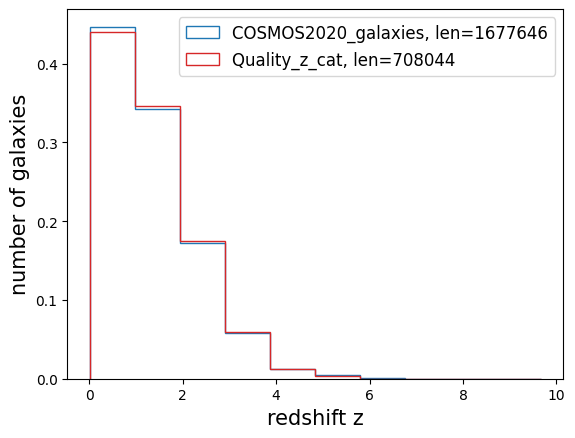

In [11]:
plt.hist(cosmos_reduced['lp_zPDF'], histtype='step', color='tab:blue', label=f'COSMOS', density=True)
plt.hist(cosmos_reduced_redshift_lp_type['lp_zPDF'], histtype='step', color='tab:red', label='Quality_z_cat, len=708044', density=True)
#plt.yscale('function')
plt.xlabel('redshift z', fontsize=15)
plt.ylabel('number of galaxies', fontsize=15)
plt.legend(fontsize=12)
plt.savefig('z_dist_final.png')

In [95]:
print(len(quality_cat_redshifts)/len(galaxy_cat))

0.42204612892111926


In [99]:
len(quality_cat)

28301

In [10]:
u_g_color_quality_imag = quality_cat['CFHT_u_FLUX_AUTO']-quality_cat['HSC_g_FLUX_AUTO']
g_r_color_quality_imag = quality_cat['HSC_g_FLUX_AUTO']-quality_cat['HSC_r_FLUX_AUTO']
r_i_color_quality_imag = quality_cat['HSC_r_FLUX_AUTO']-quality_cat['HSC_i_FLUX_AUTO']
i_Z_color_quality_imag = quality_cat['HSC_i_FLUX_AUTO']-quality_cat['HSC_z_FLUX_AUTO']
Z_Y_color_quality_imag = quality_cat['HSC_z_FLUX_AUTO']-quality_cat['HSC_y_FLUX_AUTO']
Y_J_color_quality_imag = quality_cat['HSC_y_FLUX_AUTO']-quality_cat['UVISTA_J_FLUX_AUTO']
J_H_color_quality_imag = quality_cat['UVISTA_J_FLUX_AUTO']-quality_cat['UVISTA_H_FLUX_AUTO']
H_Ks_color_quality_imag = quality_cat['UVISTA_H_FLUX_AUTO']-quality_cat['UVISTA_Ks_FLUX_AUTO']

In [36]:
mask_u_g_color_quality_imag = (np.isnan(u_g_color_quality_imag)==False)
#mask_g_r_color_quality_imag = g_r_color_quality_imag[~np.isnan(g_r_color_quality_imag)]
#mask_r_i_color_quality_imag = r_i_color_quality_imag[~np.isnan(r_i_color_quality_imag)]
#mask_i_Z_color_quality_imag = i_Z_color_quality_imag[~np.isnan(i_Z_color_quality_imag)]
#mask_Z_Y_color_quality_imag = Z_Y_color_quality_imag[~np.isnan(Z_Y_color_quality_imag)]
#mask_Y_J_color_quality_imag = Y_J_color_quality_imag[~np.isnan(Y_J_color_quality_imag)]
#mask_J_H_color_quality_imag = J_H_color_quality_imag[~np.isnan(J_H_color_quality_imag)]
#mask_H_Ks_color_quality_imag = H_Ks_color_quality_imag[~np.isnan(H_Ks_color_quality_imag)]

In [23]:
print(len(mask_u_g_color_quality_imag),
      len(mask_g_r_color_quality_imag),
      len(mask_r_i_color_quality_imag),
      len(mask_i_Z_color_quality_imag),
      len(mask_Z_Y_color_quality_imag),
      len(mask_Y_J_color_quality_imag),
      len(mask_J_H_color_quality_imag),
      len(mask_H_Ks_color_quality_imag))                         

27039 28301 28301 28301 28301 28301 28301 28301


In [37]:
mask_u_g_color_quality_imag

masked_array(data=[True, True, True, ..., True, True, True],
             mask=[False, False, False, ..., False, False, False],
       fill_value=True)

In [46]:
#u_g_color_quality_imag[mask_u_g_color_quality_imag]

In [41]:
u_g_color_cosmos = galaxy_cat['CFHT_u_FLUX_AUTO']-galaxy_cat['HSC_g_FLUX_AUTO']
g_r_color_cosmos = galaxy_cat['HSC_g_FLUX_AUTO']-galaxy_cat['HSC_r_FLUX_AUTO']
r_i_color_cosmos = galaxy_cat['HSC_r_FLUX_AUTO']-galaxy_cat['HSC_i_FLUX_AUTO']
i_Z_color_cosmos = galaxy_cat['HSC_i_FLUX_AUTO']-galaxy_cat['HSC_z_FLUX_AUTO']
Z_Y_color_cosmos = galaxy_cat['HSC_z_FLUX_AUTO']-galaxy_cat['HSC_y_FLUX_AUTO']
Y_J_color_cosmos = galaxy_cat['HSC_y_FLUX_AUTO']-galaxy_cat['UVISTA_J_FLUX_AUTO']
J_H_color_cosmos = galaxy_cat['UVISTA_J_FLUX_AUTO']-galaxy_cat['UVISTA_H_FLUX_AUTO']
H_Ks_color_cosmos = galaxy_cat['UVISTA_H_FLUX_AUTO']-galaxy_cat['UVISTA_Ks_FLUX_AUTO']

In [58]:
#mask_u_g_color_cosmos = u_g_color_cosmos[~np.isnan(u_g_color_cosmos)]
#mask_g_r_color_cosmos = g_r_color_cosmos[~np.isnan(g_r_color_cosmos)]
#mask_r_i_color_cosmos = r_i_color_cosmos[~np.isnan(r_i_color_cosmos)]
#mask_i_Z_color_cosmos = i_Z_color_cosmos[~np.isnan(i_Z_color_cosmos)]
#mask_Z_Y_color_cosmos = Z_Y_color_cosmos[~np.isnan(Z_Y_color_cosmos)]
#mask_Y_J_color_cosmos = Y_J_color_cosmos[~np.isnan(Y_J_color_cosmos)]
mask_u_g_color_cosmos = (np.isnan(u_g_color_cosmos)==False)
mask_J_H_color_cosmos = (np.isnan(J_H_color_cosmos)==False)
mask_H_Ks_color_cosmos = (np.isnan(H_Ks_color_cosmos)==False)

#mask_H_Ks_color_cosmos = H_Ks_color_cosmos[~np.isnan(H_Ks_color_cosmos)]

In [51]:
print(len(mask_u_g_color_cosmos),
      len(mask_g_r_color_cosmos),
      len(mask_r_i_color_cosmos),
      len(mask_i_Z_color_cosmos),
      len(mask_Z_Y_color_cosmos),
      len(mask_Y_J_color_cosmos),
      len(mask_J_H_color_cosmos),
      len(mask_H_Ks_color_cosmos))    

1509115 1677527 1677526 1677526 1677525 1677527 971170 973010


In [59]:
mask_cosmos_total = np.logical_and.reduce([mask_u_g_color_cosmos, mask_J_H_color_cosmos, mask_H_Ks_color_cosmos])

In [61]:
n_parameters = 8

colors1 = np.zeros((len(galaxy_cat[mask_cosmos_total]), n_parameters))
colors2 = np.zeros((len(quality_cat[mask_u_g_color_quality_imag]), n_parameters))

colors1[:,0] = u_g_color_cosmos[mask_cosmos_total]
colors1[:,1] = g_r_color_cosmos[mask_cosmos_total]
colors1[:,2] = r_i_color_cosmos[mask_cosmos_total]
colors1[:,3] = i_Z_color_cosmos[mask_cosmos_total]
colors1[:,4] = Z_Y_color_cosmos[mask_cosmos_total]
colors1[:,5] = Y_J_color_cosmos[mask_cosmos_total]
colors1[:,6] = J_H_color_cosmos[mask_cosmos_total]
colors1[:,7] = H_Ks_color_cosmos[mask_cosmos_total]

colors2[:,0] = u_g_color_quality_imag[mask_u_g_color_quality_imag]
colors2[:,1] = g_r_color_quality_imag[mask_u_g_color_quality_imag]
colors2[:,2] = r_i_color_quality_imag[mask_u_g_color_quality_imag]
colors2[:,3] = i_Z_color_quality_imag[mask_u_g_color_quality_imag]
colors2[:,4] = Z_Y_color_quality_imag[mask_u_g_color_quality_imag]
colors2[:,5] = Y_J_color_quality_imag[mask_u_g_color_quality_imag]
colors2[:,6] = J_H_color_quality_imag[mask_u_g_color_quality_imag]
colors2[:,7] = H_Ks_color_quality_imag[mask_u_g_color_quality_imag]

In [62]:
#colors1 = np.nan_to_num(colors1, nan=0.0)
#colors2 = np.nan_to_num(colors2, nan=0.0)

In [118]:
print(len(colors1))#,len(colors2[np.isnan(colors2)]))

905823


<Figure size 1000x800 with 0 Axes>

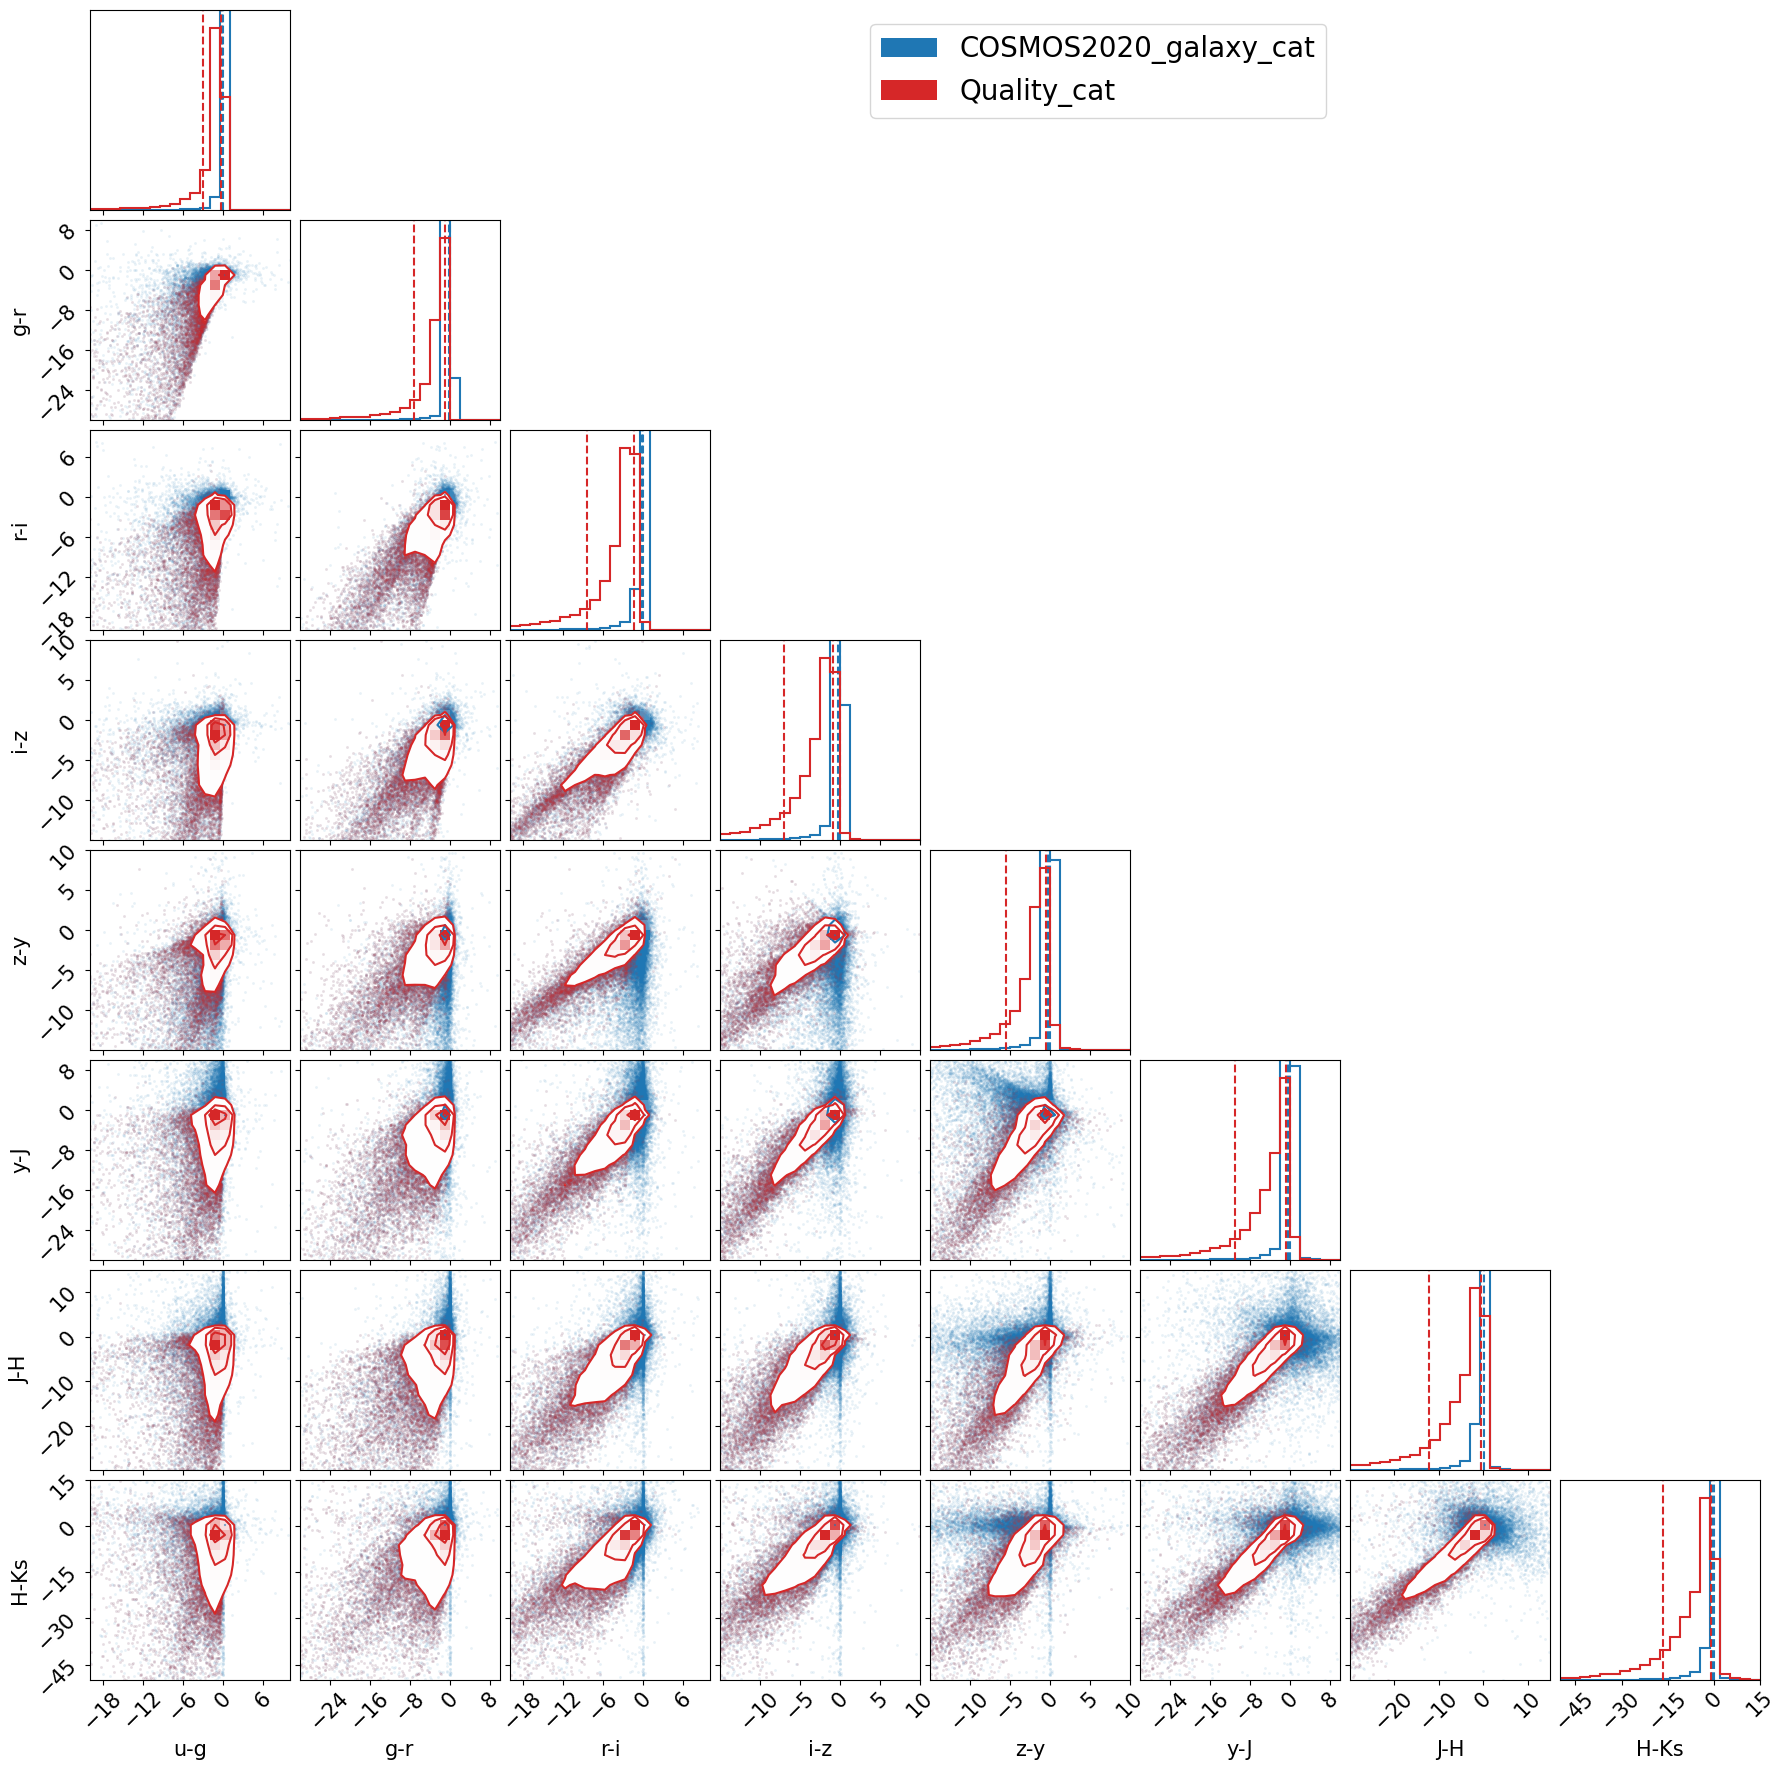

In [123]:
plt.clf()
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

labels = ['u-g','g-r','r-i','i-z','z-y','y-J','J-H','H-Ks']

ranges = [(-20,10) , (-30,10) , (-20,10) , (-15,10) , (-15,10) , (-30,10) , (-30,15) , (-50,15)]


fig = corner.corner(colors1, hist_kwargs=dict(density=True, linewidth=1.5), range=ranges, #range=extents,
                    color='tab:blue', labels=labels,
                    label_kwargs={"fontsize":15}, use_math_text=True, 
                    plot_datapoints=True, 
                    quantiles=(0.16, 0.84), 
                    #levels=(0.68,0.99), 
                    show_titles=False,
                    title_fmt='.4f')

fig = corner.corner(colors2, fig=fig, hist_kwargs=dict(density=True, linewidth=1.5), range=ranges, #range=extents,
                    color='tab:red', labels=labels,
                    label_kwargs={"fontsize":15}, use_math_text=True, 
                    plot_datapoints=True, 
                    #levels=(0.68,0.95), 
                    quantiles=(0.16, 0.84),
                    show_titles=False,
                    title_fmt='.4f')
#
#fig = corner.corner(colors2, fig = fig, hist_kwargs=dict(density=True, linewidth=1.5), range=ranges, #range=extents,
#                    color='tab:red', labels=labels,
#                    label_kwargs={"fontsize":15}, use_math_text=True, 
#                    plot_datapoints=False, quantiles=(0.16, 0.84), levels=(0.68,0.95,0.99), show_titles=False,
#                    title_fmt='.4f')

#levels=(1-np.exp(-0.5),1-np.exp(-2),1-np.exp(-4.5)),

axes = np.array(fig.axes)
proxy = [plt.Rectangle((0,0),1,1,fc = 'tab:blue'), plt.Rectangle((0,0),1,1,fc = 'tab:red')]
axes[5].legend(proxy, ['COSMOS2020_galaxy_cat', 'Quality_cat'],loc='upper right',fontsize=20)


plt.savefig('corner_final_better.png')

In [17]:
data = Table ()

data['id'] = cosmos_final['ID']
data['redshift'] = cosmos_final['lp_zPDF']
data['cfht.megacam.u'] = cosmos_final['CFHT_u_FLUX_AUTO']
data['cfht.megacam.u']*10**3
data['cfht.megacam.u_err'] = cosmos_final['CFHT_u_FLUXERR_AUTO']
data['cfht.megacam.u_err']*10**3
data['subaru.suprime.g'] = cosmos_final['HSC_g_FLUX_AUTO']
data['subaru.suprime.g']*10**3
data['subaru.suprime.g_err'] = cosmos_final['HSC_g_FLUXERR_AUTO']
data['subaru.suprime.g_err']*10**3
data['subaru.suprime.r'] = cosmos_final['HSC_r_FLUX_AUTO']
data['subaru.suprime.r']*10**3
data['subaru.suprime.r_err'] = cosmos_final['HSC_r_FLUXERR_AUTO']
data['subaru.suprime.r_err']*10**3
data['subaru.suprime.i'] = cosmos_final['HSC_i_FLUX_AUTO']
data['subaru.suprime.i']*10**3
data['subaru.suprime.i_err'] = cosmos_final['HSC_i_FLUXERR_AUTO']
data['subaru.suprime.i_err']*10**3
data['subaru.suprime.z'] = cosmos_final['HSC_z_FLUX_AUTO']
data['subaru.suprime.z']*10**3
data['subaru.suprime.z_err'] = cosmos_final['HSC_z_FLUXERR_AUTO']
data['subaru.suprime.z_err']*10**3
data['subaru.suprime.Y'] = cosmos_final['HSC_y_FLUX_AUTO']
data['subaru.suprime.Y']*10**3
data['subaru.suprime.Y_err'] = cosmos_final['HSC_y_FLUXERR_AUTO']
data['subaru.suprime.Y_err']*10**3
data['paranal.vircam.J'] = cosmos_final['UVISTA_J_FLUX_AUTO']
data['paranal.vircam.J']*10**3
data['paranal.vircam.J_err'] = cosmos_final['UVISTA_J_FLUXERR_AUTO']
data['paranal.vircam.J_err']*10**3
data['paranal.vircam.H'] = cosmos_final['UVISTA_H_FLUX_AUTO']
data['paranal.vircam.H']*10**3
data['paranal.vircam.H_err'] = cosmos_final['UVISTA_H_FLUXERR_AUTO']
data['paranal.vircam.H_err']*10**3
data['paranal.vircam.Ks'] = cosmos_final['UVISTA_Ks_FLUX_AUTO']
data['paranal.vircam.Ks']*10**3
data['paranal.vircam.Ks_err'] = cosmos_final['UVISTA_Ks_FLUXERR_AUTO']
data['paranal.vircam.Ks_err']*10**3



ascii.write(data[], 'cigale_input_data.dat', overwrite=True, delimiter=' ')

In [18]:
with open('cigale_input_data.dat', 'r') as dat_file:
    content = dat_file.read()

with open('cigale_input_data.txt', 'w') as txt_file:
    txt_file.write(content)